In [29]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import accuracy_score
from sklearn.metrics         import accuracy_score
from sklearn.preprocessing   import StandardScaler

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB

In [30]:
df = pd.read_csv("C:/Users/ISD/Python_ali/fault_detection/Pv_Data2.csv")
df;
X = df.drop(['Target'],axis=1).values

Y=df.loc[:,'Target']
X.shape

(1600, 7)

In [31]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.3,random_state=42)

In [32]:
sc=StandardScaler()

scaler = sc.fit(trainX)
trainX = scaler.transform(trainX)
testX = scaler.transform(testX)

In [33]:
model = GaussianNB()
model.fit(trainX, trainY);

In [34]:
ypred=model.predict(trainX)

In [35]:
c=accuracy_score(trainY,ypred)*100
c

42.5

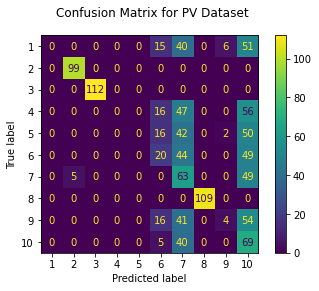

In [36]:
fig = plot_confusion_matrix(model,trainX,trainY, display_labels=model.classes_)
fig.figure_.suptitle("Confusion Matrix for PV Dataset")
plt.show()

In [37]:
ypred1=model.predict(testX)

In [38]:
c1=accuracy_score(testY,ypred1)*100
c1

45.416666666666664

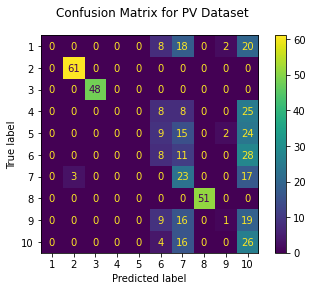

In [39]:
fig = plot_confusion_matrix(model,testX,testY, display_labels=model.classes_)
fig.figure_.suptitle("Confusion Matrix for PV Dataset")
plt.show()

In [25]:
YR=np.concatenate((trainY,testY),axis=0)

In [26]:
YP = np.concatenate((ypred,ypred1), axis=0)

In [27]:
ac2=accuracy_score(YR,YP)*100
ac2

43.375

In [28]:
c2=confusion_matrix(YR,YP)
c2

array([[  0,   0,   0,   0,   0,  23,  58,   0,   8,  71],
       [  0, 160,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 160,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  24,  55,   0,   0,  81],
       [  0,   0,   0,   0,   0,  25,  57,   0,   4,  74],
       [  0,   0,   0,   0,   0,  28,  55,   0,   0,  77],
       [  0,   8,   0,   0,   0,   0,  86,   0,   0,  66],
       [  0,   0,   0,   0,   0,   0,   0, 160,   0,   0],
       [  0,   0,   0,   0,   0,  25,  57,   0,   5,  73],
       [  0,   0,   0,   0,   0,   9,  56,   0,   0,  95]], dtype=int64)